# Image Enhancement in the Spatial Domain

In this unit, we will review various filters that help enhance images. We will focus on different types of filters and their effects on images.

For image processing, we will follow the procedure outlined below:

- **Preprocessing**: Preparing the image for further processing.
- **Processing**: The stage where the image undergoes morphological changes.
- **Post-processing**: Applying additional tools to the image based on its application.


(-0.5, 6959.5, 4639.5, -0.5)

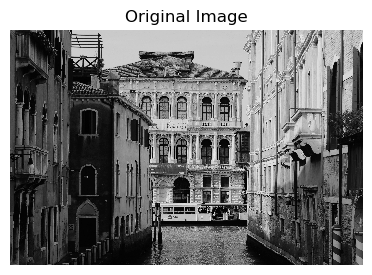

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading the image
image = cv2.imread('//home//jose//github//image_enhancement//images//image3.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')


**Band Pass Filter**

A band pass filter allows frequencies within a certain range to pass through and attenuates frequencies outside that range.

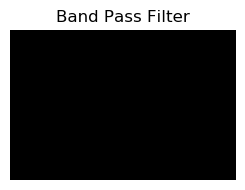

In [5]:
def band_pass_filter(image, low_freq, high_freq):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-low_freq:crow+low_freq, ccol-low_freq:ccol+low_freq] = 1
    mask[crow-high_freq:crow+high_freq, ccol-high_freq:ccol+high_freq] = 0
    
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

low_freq = 30
high_freq = 60
band_pass_image = band_pass_filter(image, low_freq, high_freq)

plt.subplot(1, 2, 2)
plt.title('Band Pass Filter')
plt.imshow(band_pass_image, cmap='gray')
plt.axis('off')
plt.show()


**Butterworth Filter**

A Butterworth filter is a type of signal processing filter designed to have a flat frequency response.

In [3]:
def butterworth_filter(image, cutoff, order):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    
    u = np.array(range(-crow, crow))
    v = np.array(range(-ccol, ccol))
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U**2 + V**2)
    
    H = 1 / (1 + (D / cutoff)**(2 * order))
    
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    
    fshift = dft_shift * H
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

cutoff = 30
order = 2
butterworth_image = butterworth_filter(image, cutoff, order)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Butterworth Filter')
plt.imshow(butterworth_image, cmap='gray')
plt.axis('off')
plt.show()


ValueError: operands could not be broadcast together with shapes (4640,6960) (6960,4640) 

**Gaussian Filter**

A Gaussian filter is a low-pass filter that smooths the image by reducing high-frequency noise.

In [ ]:
def gaussian_filter(image, sigma):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    
    u = np.array(range(-crow, crow))
    v = np.array(range(-ccol, ccol))
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U**2 + V**2)
    
    H = np.exp(-(D**2) / (2 * sigma**2))
    
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    
    fshift = dft_shift * H
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

sigma = 10
gaussian_image = gaussian_filter(image, sigma)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gaussian Filter')
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')
plt.show()


**High Pass Filter**

A high pass filter allows high-frequency components to pass through and attenuates low-frequency components.

In [ ]:
def high_pass_filter(image, cutoff):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    
    u = np.array(range(-crow, crow))
    v = np.array(range(-ccol, ccol))
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U**2 + V**2)
    
    H = 1 - np.exp(-(D**2) / (2 * cutoff**2))
    
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    
    fshift = dft_shift * H
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

cutoff = 10
high_pass_image = high_pass_filter(image, cutoff)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('High Pass Filter')
plt.imshow(high_pass_image, cmap='gray')
plt.axis('off')
plt.show()


**Butterworth High Pass Filter**

A Butterworth high pass filter is designed to allow high-frequency components to pass while attenuating low-frequency components.

In [ ]:
def butterworth_high_pass_filter(image, cutoff, order):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    
    u = np.array(range(-crow, crow))
    v = np.array(range(-ccol, ccol))
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U**2 + V**2)
    
    H = 1 / (1 + (cutoff / D)**(2 * order))
    
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    
    fshift = dft_shift * H
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

cutoff = 30
order = 2
butterworth_high_pass_image = butterworth_high_pass_filter(image, cutoff, order)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Butterworth High Pass Filter')
plt.imshow(butterworth_high_pass_image, cmap='gray')
plt.axis('off')
plt.show()


**Gaussian High Pass Filter**

A Gaussian high pass filter is designed to allow high-frequency components to pass while attenuating low-frequency components.

In [ ]:
def gaussian_high_pass_filter(image, sigma):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    
    u = np.array(range(-crow, crow))
    v = np.array(range(-ccol, ccol))
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U**2 + V**2)
    
    H = 1 - np.exp(-(D**2) / (2 * sigma**2))
    
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    
    fshift = dft_shift * H
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

sigma = 10
gaussian_high_pass_image = gaussian_high_pass_filter(image, sigma)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gaussian High Pass Filter')
plt.imshow(gaussian_high_pass_image, cmap='gray')
plt.axis('off')
plt.show()
